# Random Search Policy
this from 100 recipes for RL

In [81]:
import gymnasium as gym
import torch
import numpy as np
import matplotlib.pyplot as plt
env = gym.make('CartPole-v1')
observation, info = env.reset()


In [40]:
n_state = env.observation_space.shape[0]

n_action = env.action_space.n
n_state

4

In [51]:
state = env.reset()
state

(array([ 0.03620167, -0.01580965, -0.02823964,  0.04599418], dtype=float32),
 {})

Make sure to understand that the `done` below is not the same as the one in open AI gym itself. Simply because of the fact that there the gym env did not tell us how the game ended. It only told us that it ended.

In [140]:
def run_episode(env,weight):
    done = False
    total_reward = 0
    state,info = env.reset() # resetting environment for every game play
    truncated = False
    while (not done) and (not truncated):
        state = torch.from_numpy(state).float()
        action = torch.argmax(torch.matmul(state, weight))

#         action = env.action_space.sample()
        state, reward, done, truncated, info = env.step(action.item())
        total_reward += reward
        if done or truncated:
            state,info = env.reset()
#     state,info = env.reset()
    return total_reward
    

Make sure to understand that the way we are looking at things here is by getting a weight so as to mimic a vannilla NN forward prop. 

In [143]:
n_episodes =150
best_total_reward = 0
best_weight = 0
total_rewards = []


In [144]:
for episode in range(n_episodes):
    weight = torch.rand(n_state,n_action)
#     print(weight)
    
    total_reward = run_episode(env,weight)
    print('Episode {}: {}'.format(episode+1, total_reward))
    if total_reward > best_total_reward:
        best_total_reward = total_reward
        best_weight = weight
    total_rewards.append(total_reward)

Episode 1: 500.0
Episode 2: 115.0
Episode 3: 87.0
Episode 4: 81.0
Episode 5: 63.0
Episode 6: 9.0
Episode 7: 115.0
Episode 8: 9.0
Episode 9: 46.0
Episode 10: 10.0
Episode 11: 10.0
Episode 12: 9.0
Episode 13: 27.0
Episode 14: 34.0
Episode 15: 9.0
Episode 16: 11.0
Episode 17: 9.0
Episode 18: 9.0
Episode 19: 9.0
Episode 20: 51.0
Episode 21: 123.0
Episode 22: 10.0
Episode 23: 86.0
Episode 24: 106.0
Episode 25: 10.0
Episode 26: 27.0
Episode 27: 24.0
Episode 28: 137.0
Episode 29: 10.0
Episode 30: 50.0
Episode 31: 10.0
Episode 32: 10.0
Episode 33: 8.0
Episode 34: 13.0
Episode 35: 133.0
Episode 36: 8.0
Episode 37: 9.0
Episode 38: 9.0
Episode 39: 9.0
Episode 40: 64.0
Episode 41: 9.0
Episode 42: 9.0
Episode 43: 64.0
Episode 44: 22.0
Episode 45: 166.0
Episode 46: 10.0
Episode 47: 44.0
Episode 48: 51.0
Episode 49: 9.0
Episode 50: 55.0
Episode 51: 28.0
Episode 52: 88.0
Episode 53: 49.0
Episode 54: 10.0
Episode 55: 83.0
Episode 56: 10.0
Episode 57: 40.0
Episode 58: 88.0
Episode 59: 10.0
Episode 60: 1

In [145]:
 print('Average total reward over {} episode: {}'.format(
 n_episodes, sum(total_rewards) / n_episodes))

Average total reward over 150 episode: 53.36


In [146]:
n_episode_eval = 100
total_rewards_eval = []
for episode in range(n_episode_eval):
    total_reward = run_episode(env,best_weight)
    print('Episode {}: {}'.format(episode+1, total_reward))
    total_rewards_eval.append(total_reward)

Episode 1: 500.0
Episode 2: 500.0
Episode 3: 500.0
Episode 4: 500.0
Episode 5: 500.0
Episode 6: 500.0
Episode 7: 500.0
Episode 8: 500.0
Episode 9: 500.0
Episode 10: 500.0
Episode 11: 500.0
Episode 12: 500.0
Episode 13: 500.0
Episode 14: 500.0
Episode 15: 500.0
Episode 16: 500.0
Episode 17: 500.0
Episode 18: 500.0
Episode 19: 500.0
Episode 20: 500.0
Episode 21: 500.0
Episode 22: 500.0
Episode 23: 500.0
Episode 24: 500.0
Episode 25: 500.0
Episode 26: 500.0
Episode 27: 500.0
Episode 28: 500.0
Episode 29: 500.0
Episode 30: 500.0
Episode 31: 500.0
Episode 32: 500.0
Episode 33: 500.0
Episode 34: 500.0
Episode 35: 500.0
Episode 36: 500.0
Episode 37: 500.0
Episode 38: 500.0
Episode 39: 500.0
Episode 40: 500.0
Episode 41: 500.0
Episode 42: 500.0
Episode 43: 500.0
Episode 44: 500.0
Episode 45: 500.0
Episode 46: 500.0
Episode 47: 500.0
Episode 48: 500.0
Episode 49: 500.0
Episode 50: 500.0
Episode 51: 500.0
Episode 52: 500.0
Episode 53: 500.0
Episode 54: 500.0
Episode 55: 500.0
Episode 56: 500.0
E

In [147]:
total_rewards_eval

[500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0,
 500.0]

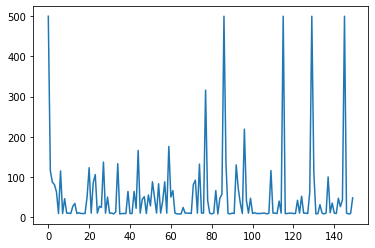

In [148]:
plt.plot(total_rewards)

Text(0.5, 0, 'Episode')

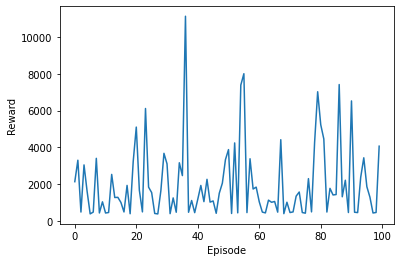

In [124]:
plt.plot(total_rewards_eval)
plt.ylabel('Reward')
plt.xlabel('Episode')

In [154]:
n_episodes =100
best_total_reward = 0
best_weight = None
total_rewards = []
for episode in range(n_episodes):
    weight = torch.rand(n_state,n_action)
    total_reward = run_episode(env,weight)
    print('Episode {}: {}'.format(episode+1, total_reward))
    if total_reward>best_total_reward:
        best_total_reward = total_reward
        best_weight = weight
    total_rewards.append(total_reward)
    if best_total_reward == 500:
        break

Episode 1: 129.0
Episode 2: 10.0
Episode 3: 25.0
Episode 4: 10.0
Episode 5: 11.0
Episode 6: 10.0
Episode 7: 500.0


In [155]:
weight

tensor([[0.2488, 0.2500],
        [0.8296, 0.1328],
        [0.0797, 0.5518],
        [0.1973, 0.7207]])

In [163]:
n_training = 1000
n_episode_training = []
for _ in range(n_training):
    for episode in range(n_episodes):

        weight = torch.rand(n_state,n_action)
        total_reward = run_episode(env,weight)
        if total_reward == 500:
            n_episode_training.append(episode+1)
            # we are trying to by which episode we are getting our 'optimal' score
            break


In [165]:
np.mean(n_episode_training)

28.41268191268191

$\therefore$ you can say it needs about 28 episodes to train